In [13]:
# data preparation
import pandas as pd
import numpy as np

# data visualzation
import matplotlib.pyplot as plt
import seaborn as sns

# outlier/anomaly detection
from sklearn.neighbors import LocalOutlierFactor
from numpy import where

In [19]:
# import data
data = pd.read_csv("C:\\Users\\admin\\Desktop\\FAX\\Analiza podatkov kupcev\\SVM\\Podatki\\Dr_podatki_obdelani4.csv",  encoding = "ISO-8859-1")

# data
df = data[["STAROST", float("POSTCODE")]]

# model specification
model1 = LocalOutlierFactor(n_neighbors = 20, metric = "euclidean")# model fitting
y_pred = model1.fit_predict(df)

ValueError: could not convert string to float: 'POSTCODE'

In [17]:
-1 in y_pred

True

In [6]:
# filter outlier index
outlier_index = where(y_pred == -1) 
outlier_index

(array([   336,    453,    533, ..., 177661, 178294, 178370], dtype=int64),)

In [7]:
# negative values are outliers and positives inliers# filter outlier values
outlier_values = df.iloc[outlier_index]
outlier_values

,PLANNO,STAROST
336,661,47
453,650,21
533,801,28
810,136,75
845,135,81
...,...,...
177033,653,1
177092,652,120
177661,650,25
178294,136,80


Text(0, 0.5, 'Starost_zavarovanca')

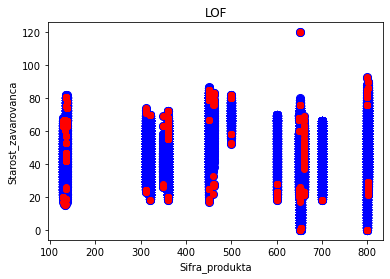

In [10]:
# plot data
plt.scatter(data["PLANNO"],df["STAROST"], color = "b", s = 65)

# plot outlier values
plt.scatter(outlier_values["PLANNO"],outlier_values["STAROST"], color = "r")
plt.title('LOF')
plt.xlabel('Sifra_produkta')
plt.ylabel('Starost_zavarovanca')